In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('hasil_cluster.xlsx')

In [14]:
df.head(60)
    

,ID PELANGGAN,GOLONGAN,BERAPA JUMLAH PENGHUNI RUMAH?,GOLONGAN_NUM,cluster
0,22233,RC - RUMAH TANGGA C,4,3,3
1,24035,RB - RUMAH TANGGA B,5,4,3
2,22235,RD - RUMAH TANGGA D,5,2,2
3,22237,SB - SOSIAL KHUSUS,2,1,2
4,24037,RB - RUMAH TANGGA B,3,4,1
5,24036,RB - RUMAH TANGGA B,2,4,1
6,21233,UA - USAHA A,8,5,3
7,21738,UA - USAHA A,5,5,3
8,21623,UA - USAHA A,2,5,1
9,6404,UA - USAHA A,2,5,1


# Menampilkan Info Dataset Keseluruhan

In [4]:
df.info

<bound method DataFrame.info of      ID PELANGGAN             GOLONGAN  BERAPA JUMLAH PENGHUNI RUMAH?  \
0           22233  RC - RUMAH TANGGA C                              4   
1           24035  RB - RUMAH TANGGA B                              5   
2           22235  RD - RUMAH TANGGA D                              5   
3           22237   SB - SOSIAL KHUSUS                              2   
4           24037  RB - RUMAH TANGGA B                              3   
..            ...                  ...                            ...   
186         22542         UA - USAHA A                              2   
187         22540         UA - USAHA A                              5   
188         25768         UA - USAHA A                              4   
189         25310         UA - USAHA A                              4   
190         25309         UA - USAHA A                              3   

     GOLONGAN_NUM  cluster  
0               3        3  
1               4        3  
2   

# Menampilkan Nilai Statistik Dataset pada data frame

In [5]:
df.describe(include='all')

,ID PELANGGAN,GOLONGAN,BERAPA JUMLAH PENGHUNI RUMAH?,GOLONGAN_NUM,cluster
count,191.000000,191,191.000000,191.000000,191.000000
unique,NaN,8,NaN,NaN,NaN
top,NaN,RB - RUMAH TANGGA B,NaN,NaN,NaN
freq,NaN,93,NaN,NaN,NaN
mean,30328.984293,NaN,3.554974,3.680628,1.937173
std,9869.311976,NaN,1.492389,1.168711,0.926925
min,6338.000000,NaN,1.000000,1.000000,1.000000
25%,23344.000000,NaN,3.000000,3.000000,1.000000
50%,28945.000000,NaN,3.000000,4.000000,2.000000
75%,41533.500000,NaN,4.000000,4.000000,3.000000


# Menampilkan Nilai X,Y

In [6]:
X = df[['BERAPA JUMLAH PENGHUNI RUMAH?','GOLONGAN_NUM']]
y = df.cluster

In [7]:
scaled = StandardScaler().fit_transform(X)
scaled

array([[ 0.29898086, -0.58390562],
       [ 0.97080843,  0.27398648],
       [ 0.97080843, -1.44179772],
       [-1.04467429, -2.29968982],
       [-0.37284672,  0.27398648],
       [-1.04467429,  0.27398648],
       [ 2.98629115,  1.13187858],
       [ 0.97080843,  1.13187858],
       [-1.04467429,  1.13187858],
       [-1.04467429,  1.13187858],
       [ 0.97080843,  1.13187858],
       [ 0.97080843,  1.13187858],
       [ 0.29898086,  1.13187858],
       [-0.37284672,  1.13187858],
       [ 0.29898086, -0.58390562],
       [-1.04467429,  1.13187858],
       [-0.37284672,  0.27398648],
       [ 0.97080843,  0.27398648],
       [ 3.65811872,  0.27398648],
       [ 0.29898086, -2.29968982],
       [-1.04467429,  0.27398648],
       [ 1.642636  ,  0.27398648],
       [ 0.97080843, -0.58390562],
       [-0.37284672,  0.27398648],
       [ 0.29898086,  0.27398648],
       [ 0.29898086,  0.27398648],
       [-1.04467429,  0.27398648],
       [ 0.29898086,  0.27398648],
       [-0.37284672,

In [8]:
X_train,X_test,y_train,y_test = train_test_split(scaled,y,random_state=0,test_size=0.2)

In [9]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
pred = knn.predict(X_test)

# Menampilkan Klasifikasi dan Akurasi pada Metode KNN

In [10]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00        16

    accuracy                           0.97        39
   macro avg       0.93      0.98      0.95        39
weighted avg       0.98      0.97      0.98        39



## Menampilkan Seaborn (Sebaran) Pada Pelanggan PDAM menggunkan KNN

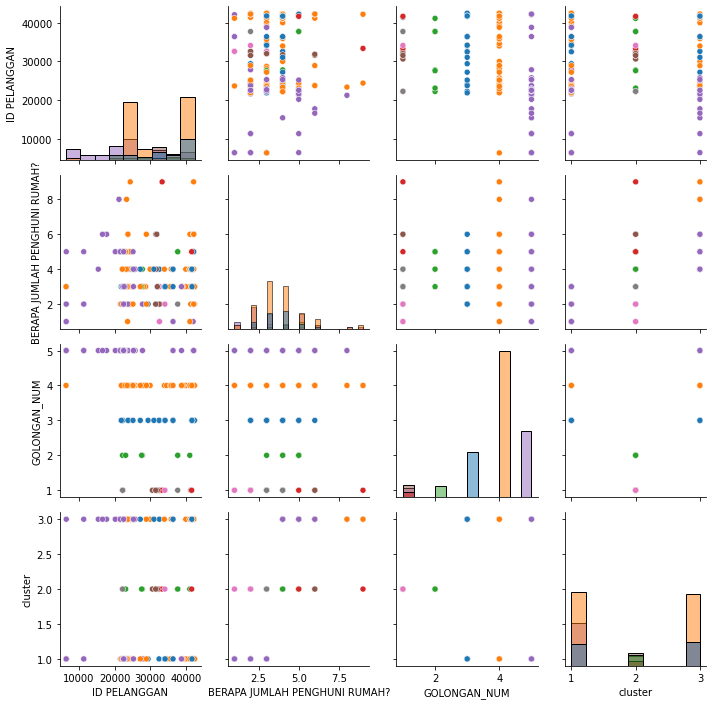

In [11]:
import seaborn as sns
g = sns.PairGrid(df,hue= "GOLONGAN")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
confusion_matrix(pred,y_test)

array([[18,  1,  0],
       [ 0,  4,  0],
       [ 0,  0, 16]], dtype=int64)